# **K-Means Clustering Algorithm**

K-Means Clustering is one of the simplest and most popular unsupervised machine learning algorithms. It is primarily used for clustering tasks, where the goal is to partition a dataset into `k` distinct, non-overlapping groups based on the similarity of data points.

## **Concepts**

### **What is Clustering?**

Clustering is the process of dividing a dataset into groups (clusters) such that:
- Data points within a group are more similar to each other.
- Data points in different groups are more dissimilar.

### **What is K-Means?**

K-Means is a centroid-based clustering algorithm. It aims to partition `n` data points into `k` clusters, where each data point belongs to the cluster with the nearest centroid (mean of the cluster).

##
---

## **Mathematical Formulation**

### **Objective Function**

K-Means minimizes the sum of squared distances between each data point and its assigned cluster centroid (K-Means minimizes the **Within-Cluster Sum of Squares (WCSS)** or **Inertia**:
):

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

Where:
- \( k \): Number of clusters.
- \( $C_i $\): Cluster \( i \).
- \( x \): A data point.
- \( $\mu_i $\): Centroid of cluster \( i \).
- \( $\| x - \mu_i \|^2 $\): Squared Euclidean distance between a data point \( x \) and its cluster centroid \( $\mu_i $\).


The goal is to find centroids \( $\mu_i $\) that minimize this objective.

##
---

## **Mathematical Intuition**

### Optimization Problem

K-Means solves the following optimization problem:
$$
\underset{C, \mu}{\text{argmin}} \sum_{k=1}^{K} \sum_{x \in C_k} \| x - \mu_k \|^2
$$

- **Hardness**: This is an NP-hard problem.
- **Solution**: K-Means uses an iterative heuristic approach (Lloyd's algorithm) to approximate the solution.


### Convergence

The algorithm converges when the assignment of points to clusters no longer changes. This corresponds to a local minimum of the objective function.


##
---

## **How K-Means Works**

### Step 1: Initialization
1. Choose the number of clusters \( K \).
2. Randomly select \( K \) initial centroids.

### Step 2: Cluster Assignment
Assign each data point \( $x_i$ \) to the nearest centroid \( $\mu_k$ \) using the distance metric:

$$
C_k = \{x_i : \| x_i - \mu_k \|^2 \leq \| x_i - \mu_j \|^2, \forall j \neq k\}
$$

### Step 3: Centroid Update
Recalculate the centroid of each cluster as the mean of all data points assigned to it:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

### Step 4: Repeat
Iterate steps 2 and 3 until:
- Centroids do not change significantly, or
- Maximum number of iterations is reached.

##
---

## **Key Parameters in K-Means**

1. `n_clusters`

- Number of clusters to form.

2. `init`

- Initialization method for centroids ('k-means++' or 'random').

3. `max_iter`

- Maximum number of iterations of the algorithm.

4. `n_init`

- Number of times the algorithm is run with different centroid seeds.

##
---

## **Choosing the Number of Clusters ( K )**

### **1. Elbow Method**

The **Elbow Method** is used to determine the optimal \( K \):
1. Compute the inertia (WCSS) for a range of \( K \) values.
2. Plot \( K \) vs. inertia.
3. The "elbow point" where the reduction in inertia slows down indicates the optimal \( K \).

**Inertia Formula**:
$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x \in C_k} \| x - \mu_k \|^2
$$

### **2. Silhouette Score**

- Measures how similar a data point is to its cluster compared to other clusters.
- Ranges from -1 (poor clustering) to 1 (excellent clustering).

![Silhouette Score.png](../images/Silhouette%20Score.png)

##
---

## **Variants of K-Means**

- Mini-Batch K-Means:

  - Processes small random batches of data, making it more scalable for large datasets.

- K-Medoids:

  - Uses medoids (actual data points) as cluster centers instead of centroids.

- Fuzzy C-Means:

  - Each data point belongs to clusters with a degree of membership rather than hard assignment.

##
---

## **Evaluation Metrics**

### 1. Inertia

- Measures the sum of squared distances of samples to their nearest cluster centroid.

- Lower inertia indicates better clustering.
```python
print("Inertia:", kmeans.inertia_)
```

### 2. Silhouette Score

- Measures cluster quality by comparing intra-cluster distance with inter-cluster distance.
```python
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette)
```

##
---

## **Advantages and Limitations**

### Advantages
- Simple and easy to implement.
- Works well with large datasets.
- Computationally efficient.

### Limitations
- Sensitive to the initialization of centroids.
- Assumes clusters are spherical and of equal size.
- Does not handle noisy data or outliers well.

##
---

## **Python Implementation**

[Implementation of KMeans Clustering](./02%20-%20Implement%20K-Means%20Clustering%20Algorithm.ipynb)

### 1. Basic Example

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dataset")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()

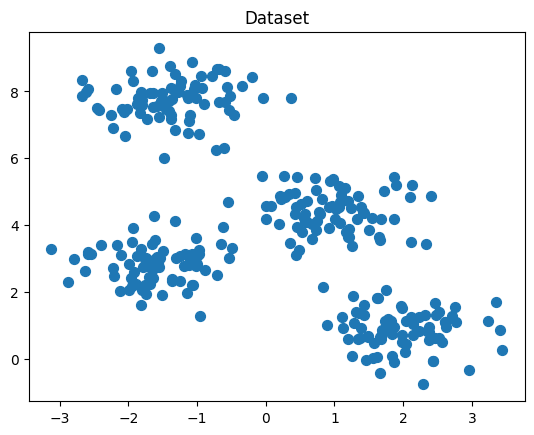

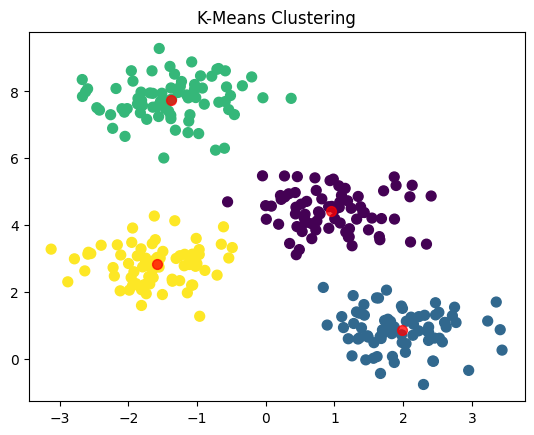

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dataset")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='.')
plt.title("K-Means Clustering")
plt.show()

###
---

### 2. Elbow Method 

```python
# Determine the optimal number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
```

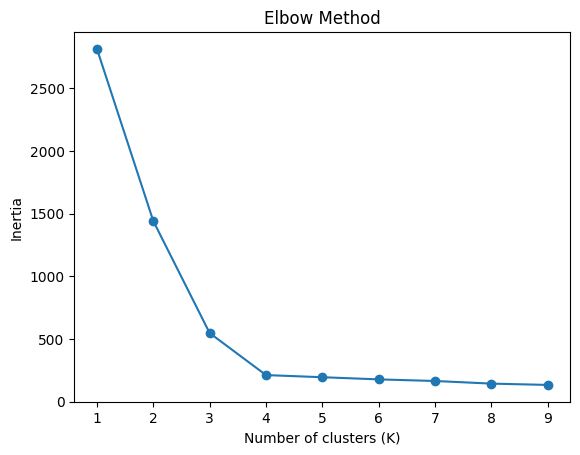

In [10]:
# Determine the optimal number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

###
---

### 3. Silhouette Analysis

```python
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different k
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()
```

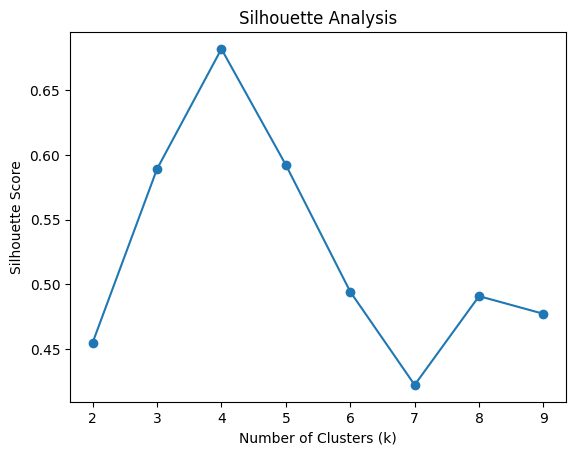

In [11]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different k
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

##
---

## **Advanced Topics**

1. Initialization Sensitivity

    - Poor initialization can lead to suboptimal clustering. Use the k-means++ method to improve initial centroid selection.

2. Handling Outliers

    - Outliers can skew centroids. Consider using K-Medoids or clustering methods like DBSCAN for datasets with significant noise.

##
---

## **Applications**

- Customer segmentation.
- Image compression.
- Document clustering.
- Anomaly detection.

##
---

## **Conclusion**

- K-Means Clustering is a powerful algorithm for grouping similar data points based on proximity.

- It minimizes the variance within clusters using an iterative approach.

- Despite its limitations, it is widely used due to its simplicity and effectiveness.


##
---